In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import operator
from sklearn.neighbors import KNeighborsClassifier

## Q1 (a)

In [2]:
def manhattan(vector_1, vector_2):
    """
        This is the L1 Norm
    """
    if len(vector_1)!=len(vector_2):
        print("Error! Vectors are not of the same length!")
        return
    else:
        new_value = 0
        for i in range(len(vector_1)):
            new_value+=np.abs(vector_1[i] - vector_2[i])
        return new_value
    
def cosine(vector_1, vector_2):
    """
        This is 1 - cosine of the angle between the two vector
        This ensures ( I am assuming ) all the properties that every standard norm will satisfy
    """
    if len(vector_1)!=len(vector_2):
        print("Error! Vectors do not have the same dimension")
        return
    else:
        new_value = 0
        for i in range(len(vector_1)):
            new_value+=vector_1[i]*vector_2[i]
        new_value/=(np.linalg.norm(vector_1)*np.linalg.norm(vector_2))
        return (1 - new_value)

def knn_predict(train_x, train_y, test_x, problem_type='classification',k=5, distance_metric = 'Euclidean'):
    
    if problem_type=='classification':
        """
            Do classification
        """
        if distance_metric == 'Euclidean':
            final_labels = []
            for elem in test_x:
                distance = []
                for index in range(len(train_x)):
                    distance.append((np.linalg.norm(train_x[index] - elem),index))
                distance = sorted(distance, key=lambda x:x[0])
                result = distance[:k]
                new_dict = {}
                for elem in result:
                    if y_train[elem[1]] in new_dict:
                        new_dict[y_train[elem[1]]]+=1
                    else:
                        new_dict[y_train[elem[1]]]=1
                key_max_value = max(new_dict.items(), key=operator.itemgetter(1))[0]
                final_labels.append(key_max_value)
            return np.array(final_labels)

        
        if distance_metric=='Manhattan':
            final_labels = []
            for elem in test_x:
                distance = []
                for index in range(len(train_x)):
                    distance.append((manhattan(train_x[index],elem),index))
                distance = sorted(distance, key=lambda x:x[0])
                result = distance[:k]
                new_dict = {}
                for elem in result:
                    if y_train[elem[1]] in new_dict:
                        new_dict[y_train[elem[1]]]+=1
                    else:
                        new_dict[y_train[elem[1]]]=1
                key_max_value = max(new_dict.items(), key=operator.itemgetter(1))[0]
                final_labels.append(key_max_value)
            return np.array(final_labels)
                
        if distance_metric == 'Cosine':
            final_labels = []
            for elem in test_x:
                distance = []
                for index in range(len(train_x)):
                    distance.append((cosine(elem,train_x[index]),index))
                distance = sorted(distance, key=lambda x:x[0])
                result = distance[:k]
                new_dict = {}
                for elem in result:
                    if y_train[elem[1]] in new_dict:
                        new_dict[y_train[elem[1]]]+=1
                    else:
                        new_dict[y_train[elem[1]]]=1
                key_max_value = max(new_dict.items(), key=operator.itemgetter(1))[0]
                final_labels.append(key_max_value)
            return np.array(final_labels)
            
    if problem_type == 'regression':
        """
            Do Regression
        """
        if distance_metric == 'Euclidean':
            final_value = []
            for elem in test_x:
                distance = []
                for index in range(len(train_x)):
                    distance.append((np.linalg.norm(train_x[index] - elem),index))
                distance = sorted(distance, key=lambda x:x[0])
                result = distance[:k]
                mean_value = 0
                for i in range(len(result)):
                    mean_value+=y_train[result[i][1]]
                mean_value/=k
                final_value.append(mean_value)
            return np.array(final_value)
        
        if distance_metric=='Manhattan':
            final_labels = []
            for elem in test_x:
                distance = []
                for index in range(len(train_x)):
                    distance.append((manhattan(train_x[index],elem),index))
                distance = sorted(distance, key=lambda x:x[0])
                result = distance[:k]
                mean_value = 0
                for i in range(len(result)):
                    mean_value+=y_train[result[i][1]]
                mean_value/=k
                final_value.append(mean_value)
            return np.array(final_value)
        
        if distance_metric == 'Cosine':
            final_labels = []
            for elem in test_x:
                distance = []
                for index in range(len(train_x)):
                    distance.append((cosine(elem,train_x[index]),index))
                distance = sorted(distance, key=lambda x:x[0])
                result = distance[:k]
                mean_value = 0
                for i in range(len(result)):
                    mean_value+=y_train[result[i][1]]
                mean_value/=k
                final_value.append(mean_value)
            return np.array(final_value)
        
    if problem_type!='classification' or problem_type!='regression':
        print("Invalid Type of Problem - Kindly choose between classification and regression")
        return

## Q1 (b)

In [3]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import time

In [4]:
data_test = make_classification(n_samples=100)
X_train, X_test, y_train, y_test = train_test_split(data_test[0],data_test[1],test_size=0.2)
predicted_cosine = knn_predict(X_train, y_train, X_test, distance_metric='Cosine')
predicted_manhattan = knn_predict(X_train,y_train,X_test, distance_metric='Manhattan')
predicted_euclidean = knn_predict(X_train, y_train, X_test)
print("Testing custom implementation of KNN with Scikit Learn Model on Random Data")
print()
print('*'*65)
print()
print("Cosine based KNN Prediction Accuracy ",(len(y_test) - np.count_nonzero(predicted_cosine - y_test))/len(y_test)*100)
print("Manhattan Distance based KNN Prediction Accuracy ",(len(y_test) - np.count_nonzero(predicted_manhattan - y_test))/len(y_test)*100)
print("Euclidean Distance based KNN Prediction Accuracy ",(len(y_test) - np.count_nonzero(predicted_euclidean - y_test))/len(y_test)*100)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
predicted_knn = knn.predict(X_test)
print("Scikit Learn based KNN Prediction Accuracy ",(len(y_test) - np.count_nonzero(predicted_knn - y_test))/len(y_test)*100)

Testing custom implementation of KNN with Scikit Learn Model on Random Data

*****************************************************************

Cosine based KNN Prediction Accuracy  80.0
Manhattan Distance based KNN Prediction Accuracy  80.0
Euclidean Distance based KNN Prediction Accuracy  70.0
Scikit Learn based KNN Prediction Accuracy  70.0


In [5]:
samples = [i for i in range(100,2500,10)]
time_taken = []
for sample in samples:
    classification_data = make_classification(n_samples=sample)
    X_train, X_test, y_train,y_test = train_test_split(classification_data[0],classification_data[1],test_size=0.2)
    start_time = time.time()
    predicted_labels = knn_predict(X_train,y_train, X_test)
    end_time = time.time()
    time_taken.append((sample,end_time - start_time))

Text(0.5, 1.0, 'KNN - Time Taken v/s total sample count')

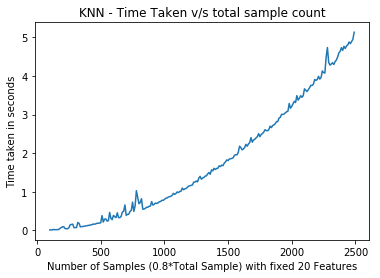

In [6]:
plt.plot([i[0] for i in time_taken],[i[1] for i in time_taken])
plt.xlabel('Number of Samples (0.8*Total Sample) with fixed 20 Features')
plt.ylabel('Time taken in seconds')
plt.title('KNN - Time Taken v/s total sample count')

In [12]:
samples = [i for i in range(100,2000,10)]
time_taken = []
for sample in samples:
    classification_data = make_classification(n_features=sample,n_samples=2000)
    X_train, X_test, y_train,y_test = train_test_split(classification_data[0],classification_data[1],test_size=0.2)
    start_time = time.time()
    predicted_labels = knn_predict(X_train,y_train, X_test)
    end_time = time.time()
    time_taken.append((sample,end_time - start_time))

Text(0.5, 1.0, 'KNN - Time Taken v/s Number of features')

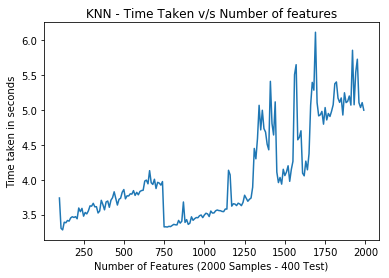

In [13]:
plt.plot([i[0] for i in time_taken],[i[1] for i in time_taken])
plt.xlabel('Number of Features (2000 Samples - 400 Test)')
plt.ylabel('Time taken in seconds')
plt.title('KNN - Time Taken v/s Number of features')

The theoretical runtime complexity would be $O(nd + kn)$, where $n$ is the number of training samples, $k$ is the number of neighbors under consideration and $d$ is the number of features or, in terms of distance, the number of dimensions of each data point.

As can be seen, both the plots are almost linear, when one is fixed and the other is varying, thus holding up to the theoretical expectation.